In [25]:
import pandas as pd
import seaborn as sns

In [34]:
data = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [35]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [36]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [37]:
data['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

## Train test split

In [38]:
x=data.drop('variety',axis=1)
y=data['variety']

In [39]:
from sklearn.model_selection import train_test_split
train_X,test_x,train_Y,test_y = train_test_split(x,y,test_size=5.0,random_state=42)


ValueError: test_size=5.0 should be either positive and smaller than the number of samples 150 or a float in the (0, 1) range

## Model Building

In [40]:
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()
nb_model.fit(train_X,train_Y)

GaussianNB()

### Predict on test set 

In [41]:
pred_y = nb_model.predict(test_x)
pred_y

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype='<U10')

## Evaluate model 

In [42]:
from sklearn.metrics import confusion_matrix


In [43]:
cf_mat = confusion_matrix(test_y,pred_y)
cf_mat


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

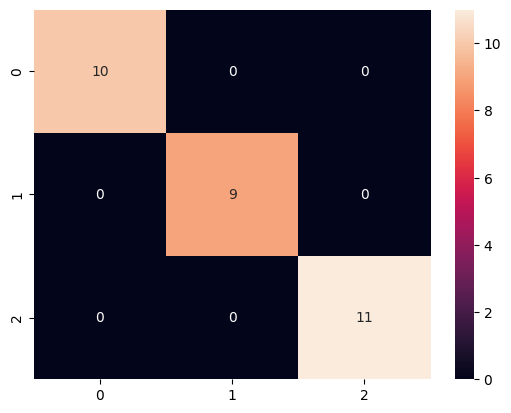

In [44]:
sns.heatmap(cf_mat,annot=True, fmt='d')

In [45]:
# Compute accuracy , error rate, precision, recall
from sklearn.metrics import (accuracy_score,precision_score,recall_score)
 
accuracy = accuracy_score(test_y,pred_y)
error_rate= 1-accuracy
precision = precision_score(test_y,pred_y,average='weighted')
recall = recall_score(test_y,pred_y,average='weighted')

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy*100:.2f}")
print(f"Error Rate:{error_rate*100:.2f}")
print("Precision:", precision)
print("Recall:", recall)


Evaluation Metrics:
Accuracy: 100.00
Error Rate:0.00
Precision: 1.0
Recall: 1.0
